In [60]:

import sys
import pandas as pd
import nltk
from sklearn.metrics import classification_report
#Data Preprocessing
import html
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [61]:
df = pd.read_csv("processed_reviews_split_RESIT_minimal.csv")
df.head()


,review_id,text,verified,review_score,product_category
0,product_review_000000,OMG this is sooo good.. Very Good!!!,True,5.0,prime_pantry
1,product_review_000001,This soap smells pretty good and it seems to w...,True,4.0,prime_pantry
2,product_review_000002,Don't seem to dissolve after quite some time. ...,False,1.0,prime_pantry
3,product_review_000003,these zip bags do as they should. very good. I...,True,5.0,prime_pantry
4,product_review_000004,What. A. Mess.\nI recommend making this in a m...,True,2.0,prime_pantry


In [62]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

<AxesSubplot:>

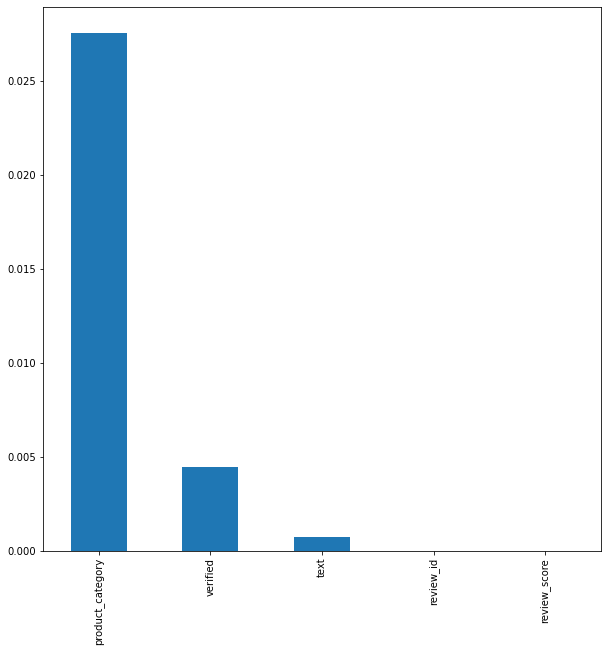

In [63]:
#missing values percentage plot for all the features
import matplotlib.pyplot as plt
Miss_val = df.isna().sum()/df.shape[0]
Miss_val.sort_values(ascending=False, inplace=True)
Miss_val
plt.figure(figsize=(10,10))
Miss_val.plot.bar()

In [64]:
drp=df[df.isnull().any(axis=1)]
idd=drp['review_id']

In [65]:
idd=list(idd)

In [66]:
l=[]
for i in df['review_id']:
    if i in idd:
        exc='1 reason = missing'
        l.append(exc)
    else:
        exc='0 reason = complete rows'
        l.append(exc)

In [67]:
exclusivedf=df.copy()
exclusivedf['excluded']=l

In [68]:
exclusivedf.to_csv('exclusivedataset.csv')

In [69]:
#dropping  missing values rows
df = df.dropna(axis=0)
df=df.reset_index(drop=True)
df

,review_id,text,verified,review_score,product_category
0,product_review_000000,OMG this is sooo good.. Very Good!!!,True,5.0,prime_pantry
1,product_review_000001,This soap smells pretty good and it seems to w...,True,4.0,prime_pantry
2,product_review_000002,Don't seem to dissolve after quite some time. ...,False,1.0,prime_pantry
3,product_review_000003,these zip bags do as they should. very good. I...,True,5.0,prime_pantry
4,product_review_000004,What. A. Mess.\nI recommend making this in a m...,True,2.0,prime_pantry
...,...,...,...,...,...
27228,product_review_028147,Ordered two of the bandaids which we use most....,True,5.0,prime_pantry
27229,product_review_028148,Taste is ok..,True,5.0,prime_pantry
27230,product_review_028149,healthy tasty side dish.,True,5.0,prime_pantry
27231,product_review_028151,Don't let the packaging turn you away - Jack B...,False,5.0,luxury_beauty


# replacing null values with mode for object type features

# Cleaning the data

# Let's first clean the data, remove stopwords etc and perform basic pre-processing

Removing weird spaces

In [70]:
def remove_spaces(text):
    text=text.strip()
    text=text.split()
    return ' '.join(text)

# Contraction

In [71]:
contraction = {'cause':'because',
              'aint': 'am not',
              'aren\'t': 'are not'}

def mapping_replacer(x,dic):
    for words in dic.keys():
        if ' ' + words + ' ' in x:
            x=x.replace(' '+ words +' ' ,' '+dic[words]+' ' )
    return x

# Stemming, lemmetisation and tokenisation

In [72]:

from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer

nltk.LancasterStemmer
ls = LancasterStemmer()
lem = WordNetLemmatizer()
def lexicon_normalization(text):
    words = word_tokenize(text) 
    
    
    # 1- Stemming
    words_stem = [ls.stem(w) for w in words]
    
    # 2- Lemmatization
    words_lem = [lem.lemmatize(w) for w in words_stem]
    return words_lem


# Removing links, brackets, numbers, punctuations etc.

In [73]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('_', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    
    return text

# Handling stopwords

In [74]:
from collections import Counter
def remove_stopword(text):
    stop_words = stopwords.words('english')
    stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stopwords_dict])
    return text

# Tokenisation

In [75]:
def tokenise(text):
    words = word_tokenize(text) 
    return words

# Applying data cleaning steps to data
Cleaning Regex Expressions from data

In [76]:
import re
df['text'] = df['text'].map(lambda x: re.sub(r'\W+', ' ', str(x)))
df['text'] = df['text'].replace(r'\W+', ' ', regex=True)

In [77]:
df['text']=df['text'].apply(lambda x: mapping_replacer(x, contraction))

In [5]:
df['text']=df['text'].apply(lambda x:clean_text(x))

NameError: name 'df' is not defined

In [79]:
df['text']=df['text'].apply(lambda x: remove_stopword(x))

In [4]:
df['text']=df['text'].apply(lambda x: lexicon_normalization(x))

NameError: name 'df' is not defined

# Finding the most Common words in our Text

# Common words for video product category

In [81]:
video=df[df['product_category']=='luxury_beauty']

In [82]:
top = Counter([item for sublist in video['text'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words_video_categotry','count']
temp.style.background_gradient(cmap='Blues')

,Common_words_video_categotry,count
0,u,6557
1,skin,5106
2,produc,5017
3,lik,3655
4,look,2213
5,feel,2161
6,fac,2100
7,work,2076
8,gre,2057
9,real,2051


<AxesSubplot:xlabel='count', ylabel='Common_words_video_categotry'>

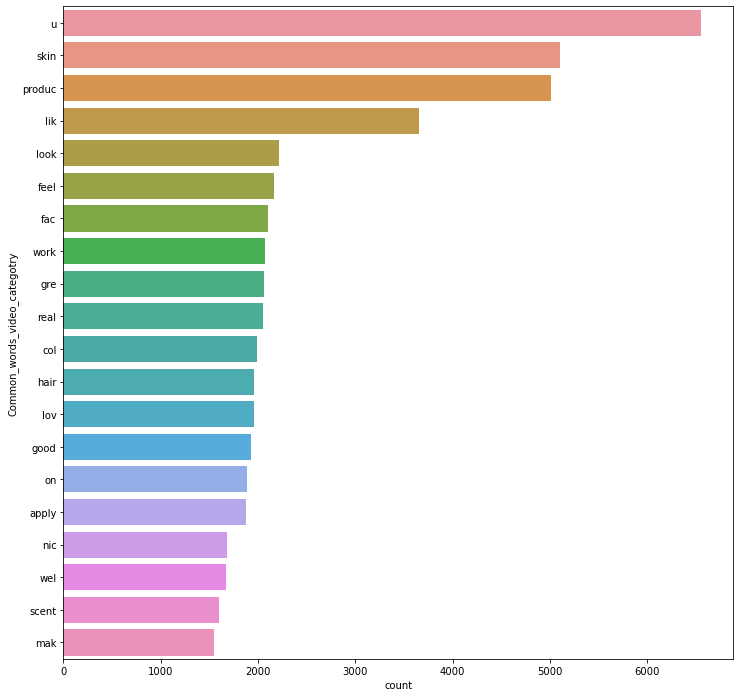

In [83]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.barplot(temp['count'],temp['Common_words_video_categotry'])

# Common words for music product category

In [84]:
music=df[df['product_category']=='prime_pantry']

In [85]:
top2 = Counter([item for sublist in music['text'] for item in sublist])
temp2 = pd.DataFrame(top2.most_common(20))
temp2.columns = ['Common_words_music_categotry','count']
temp2.style.background_gradient(cmap='Blues')

,Common_words_music_categotry,count
0,good,7599
1,gre,7315
2,lov,5551
3,lik,5353
4,u,4981
5,tast,4539
6,produc,3573
7,flav,3142
8,on,2606
9,pric,2311


<AxesSubplot:xlabel='count', ylabel='Common_words_music_categotry'>

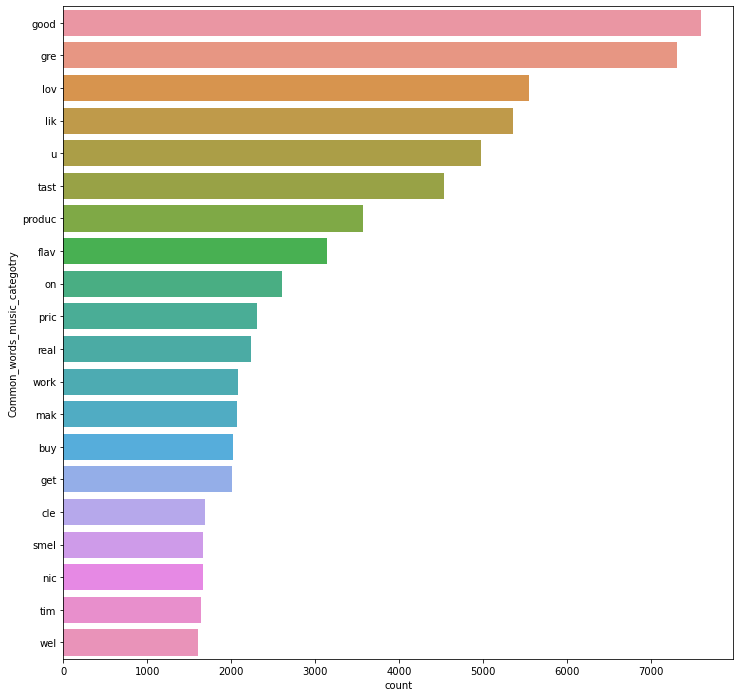

In [86]:
plt.figure(figsize=(12,12))
sns.barplot(temp2['count'],temp2['Common_words_music_categotry'])

In [87]:
l=[]
for i in df['text']:
    str1 = " " 
    t=str1.join(i)
    l.append(t)
df['text']=l   

# 1:Product cagegory prediction

# #Converting Tweet feature into a vector using Bag of words technique

In [88]:
 #Converting Tweet feature into a vector using Bag of words technique
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
b=vectorizer.get_feature_names()
  
  
 

In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

In [90]:
df

,review_id,text,verified,review_score,product_category
0,product_review_000000,omg sooo good good,True,5.0,prime_pantry
1,product_review_000001,soap smel pretty good seem work gre definit mu...,True,4.0,prime_pantry
2,product_review_000002,seem dissolv quit tim see cle benefit smel nic...,False,1.0,prime_pantry
3,product_review_000003,zip bag good happy awesom,True,5.0,prime_pantry
4,product_review_000004,mess recommend mak much larg contain littl bow...,True,2.0,prime_pantry
...,...,...,...,...,...
27228,product_review_028147,ord two bandaid u band aid brand adher band to...,True,5.0,prime_pantry
27229,product_review_028148,tast ok,True,5.0,prime_pantry
27230,product_review_028149,healthy tasty sid dish,True,5.0,prime_pantry
27231,product_review_028151,let pack turn away jack black ep moist cle cre...,False,5.0,luxury_beauty


In [91]:
ddf=df.drop(['text','review_id'],axis=1)

# #creating a dataframe of the array which was converted into a vector and concatinating it with other features

In [92]:
 #creating a dataframe of the array which was converted into a vector and concatinating it with other features
df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
res = pd.concat([df1, ddf], axis=1)

MemoryError: Unable to allocate 2.32 GiB for an array with shape (27233, 11444) and data type int64

# Encoding categorical features

In [ ]:
a=df.select_dtypes(include='object')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['product_category']=le.fit_transform(df['product_category'])

# defining inputs and outputs as X and y respectively

In [ ]:
X=df1
y=df['product_category']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:

from sklearn.tree import DecisionTreeClassifier


In [ ]:
from sklearn.metrics import confusion_matrix

dt =DecisionTreeClassifier(random_state=10000)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
y_predict_dt_train = dt.predict(X_train)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_dt)
sns.heatmap(cm, annot=True, fmt="d")


In [ ]:
print('train accuracy',accuracy_score((y_train), y_predict_dt_train))
print('test accuracy',accuracy_score((y_test), y_predict_dt))
print('precision',precision_score(y_test, y_predict_dt, average='macro'))
print('recall',recall_score(y_test, y_predict_dt, average='macro'))

In [ ]:
print(classification_report(y_test, y_predict_dt))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(random_state=10000) 
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
y_predict_rf_train = rf.predict(X_train)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_rf)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
print(' train accuracy',accuracy_score((y_train), y_predict_rf_train))
print(' test accuracy',accuracy_score((y_test), y_predict_rf))
print('precision',precision_score(y_test, y_predict_rf))
print('recall',recall_score(y_test, y_predict_rf))

In [ ]:
print(classification_report(y_test, y_predict_rf))

In [ ]:
### Compute ROC curve and ROC area for predictions on validation set
from sklearn.metrics import roc_curve, auc

### Plot
plt.figure(figsize=(10,10))
lw = 2

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_predict_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='blue',
         lw=lw, label='Random Forest (area = %0.2f)' % roc_auc_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_predict_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree (area = %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 2:review_score prediction

In [ ]:
vectorizer2 = CountVectorizer(max_features=2500)
X2 = vectorizer2.fit_transform(df['text'])
b2=vectorizer2.get_feature_names()
  
  

In [ ]:
 #creating a dataframe of the array which was converted into a vector and concatinating it with other features
df2 = pd.DataFrame(X2.toarray(), columns=vectorizer2.get_feature_names())

In [ ]:
X2=df2
y2=df[['review_score']]

In [ ]:
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# summarize class distribution
print(Counter(y2))
# define resampling
# transform the dataset
strategy = {5.0:18681, 4.0:10000,3.0:10000,2.0:9000,1.0:8500,-1.0:8000}
over = RandomOverSampler(sampling_strategy=strategy)
# define pipeline
pipeline = Pipeline(steps=[('o', over)])
X2, y2 = pipeline.fit_resample(X2, y2)
# summarize class distribution
print(Counter(y2))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [ ]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.33, random_state=42)

In [ ]:
dt2 =DecisionTreeClassifier(random_state=1024)
dt2.fit(X_train2, y_train2)
y_predict_dt2 = dt2.predict(X_test2)
# confusion_matrix
cm = confusion_matrix(y_test2, y_predict_dt2)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")


In [ ]:
print('accuracy',accuracy_score((y_test2), y_predict_dt2))
print('precision',precision_score(y_test2, y_predict_dt2, average='macro'))
print('recall',recall_score(y_test2, y_predict_dt2, average='macro'))

In [ ]:
rf2 =RandomForestClassifier(random_state=1000) 
rf2.fit(X_train2, y_train2)
y_predict_rf2 = rf2.predict(X_test2)
# confusion_matrix
cm = confusion_matrix(y_test2, y_predict_rf2)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
print('accuracy',accuracy_score((y_test2), y_predict_rf2))
print('precision',precision_score(y_test2, y_predict_rf2, average='macro'))
print('recall',recall_score(y_test2, y_predict_rf2, average='macro'))